In [14]:
import pandas as pd
from utils import load_and_prepare_building_dfs
import matplotlib.pyplot as plt
import datetime
from dtaidistance import dtw
import numpy as np
from tslearn.neighbors import KNeighborsTimeSeries

In [5]:
building_dfs = load_and_prepare_building_dfs(esave_path="data/EsaveExport_Trondheim Kommune_Trondheim_10121314.xls", vis_path='data/VIS Målere.xlsx')

anomalies = pd.read_excel('data/anomaly_confidence.xlsx', decimal=',')
anomalies.rename(columns={anomalies.columns[0]: 'datetime'}, inplace=True)
anomalies['datetime'] = pd.to_datetime(anomalies['datetime'], dayfirst=True)
anomalies.set_index('datetime', inplace=True)
anomalies.sort_index()

anomalies

Data loaded in 89.02694034576416 seconds


,Trondheim Kommune - General Wibes veg 1,Trondheim Kommune - Spongdal skole og Byneshallen,Trondheim Kommune - Ladesletta helse- og velferdssenter,Trondheim Kommune - Leangen Ishall,Trondheim Kommune - Åsveien skole og Åsveihallen,Trondheim Kommune - Spongdal skole,Trondheim Kommune - Trondheim Hovedbrannstasjon (Sluppen),Trondheim Kommune - Stavset bskole,Trondheim Kommune - Brøset Interim skole,Trondheim Kommune - Lilleby skole,...,Trondheim Kommune - Charlottenlund barnehage,Trondheim Kommune - Cecilienborg barnehage,Trondheim Kommune - Brøset Prestekragen barnehage,Trondheim Kommune - Brøset Marikåpa barnehage,Trondheim Kommune - Bromstad barnehage,Trondheim Kommune - Brinken barnehage,Trondheim Kommune - Breidablikk barnehage,Trondheim Kommune - Brannhaugen Barnehage,Trondheim Kommune - Blomsterbyen barnehage,Trondheim Kommune - Angelltrøa barnehage
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.06,0.07,0.41,0.00,0.02,0.07,0.19,0.25,0.08,0.09,...,0.01,0.32,0.16,0.04,0.02,0.02,0.06,0.08,0.02,0.05
2015-01-02,0.09,0.06,0.55,0.03,0.02,0.06,0.10,0.24,0.04,0.06,...,0.02,0.36,0.02,0.03,0.01,0.02,0.02,0.08,0.02,0.03
2015-01-03,0.15,0.08,0.67,0.04,0.03,0.08,0.13,0.11,0.02,0.12,...,0.00,0.43,0.00,0.00,0.02,0.02,0.01,0.04,0.01,0.03
2015-01-04,0.07,0.07,0.36,0.01,0.01,0.07,0.09,0.27,0.22,0.14,...,0.05,0.45,0.00,0.00,0.02,0.02,0.05,0.06,0.01,0.02
2015-01-05,0.02,0.03,0.09,0.07,0.00,0.03,0.04,0.37,0.58,0.00,...,0.09,0.09,0.04,0.00,0.01,0.03,0.09,0.04,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,0.02,0.23,0.05,0.03,0.01,0.23,0.51,0.16,0.00,0.04,...,0.04,0.09,0.00,0.00,0.00,0.02,0.00,0.06,0.03,0.01
2019-12-29,0.00,0.17,0.01,0.05,0.02,0.17,0.05,0.15,0.02,0.03,...,0.05,0.03,0.06,0.02,0.01,0.03,0.18,0.11,0.08,0.01
2019-12-30,0.01,0.18,0.08,0.02,0.03,0.18,0.01,0.16,0.04,0.01,...,0.04,0.04,0.06,0.08,0.03,0.07,0.39,0.15,0.08,0.03


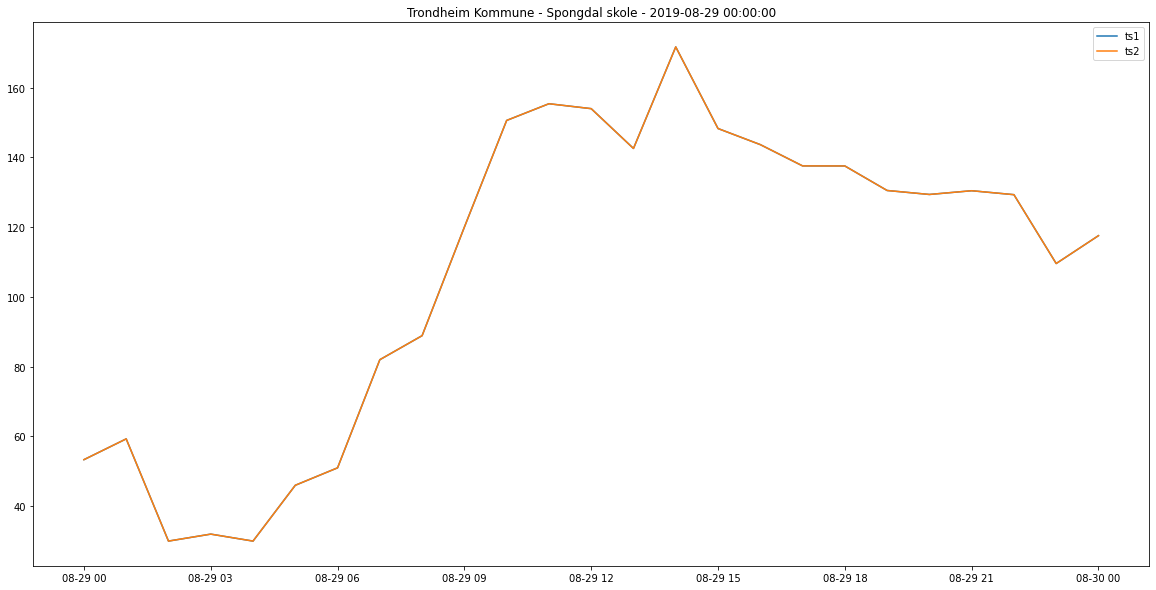

start: 2019-08-29 00:00:00 	 end: 2019-08-30 00:00:00 	 distance: 0.0


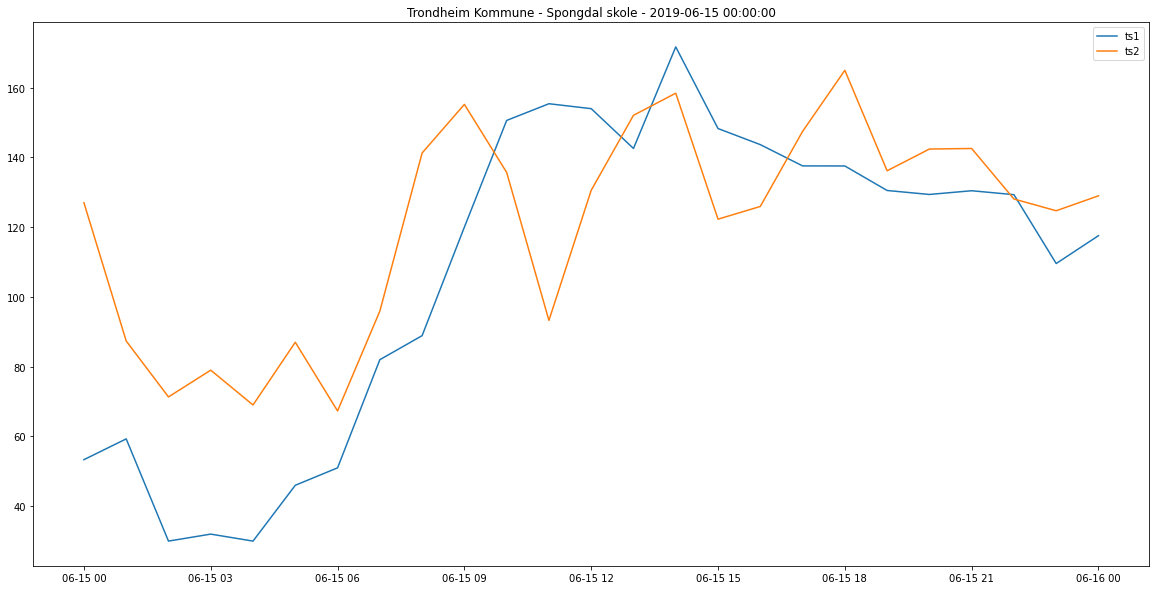

start: 2019-06-15 00:00:00 	 end: 2019-06-16 00:00:00 	 distance: 128.16489417933448


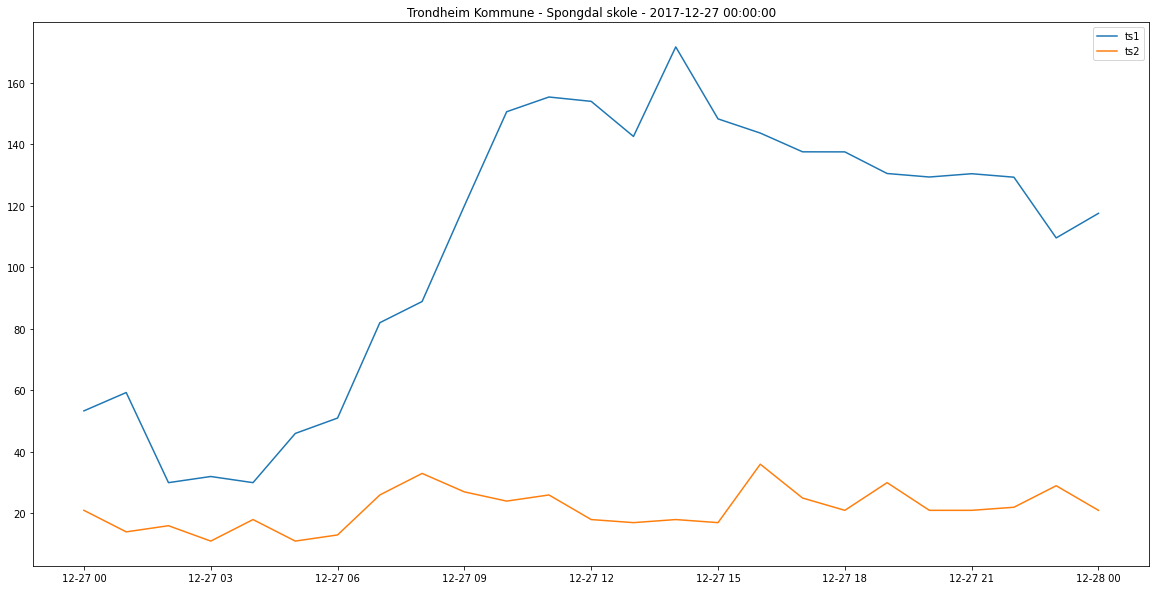

start: 2017-12-27 00:00:00 	 end: 2017-12-28 00:00:00 	 distance: 446.9690510538733


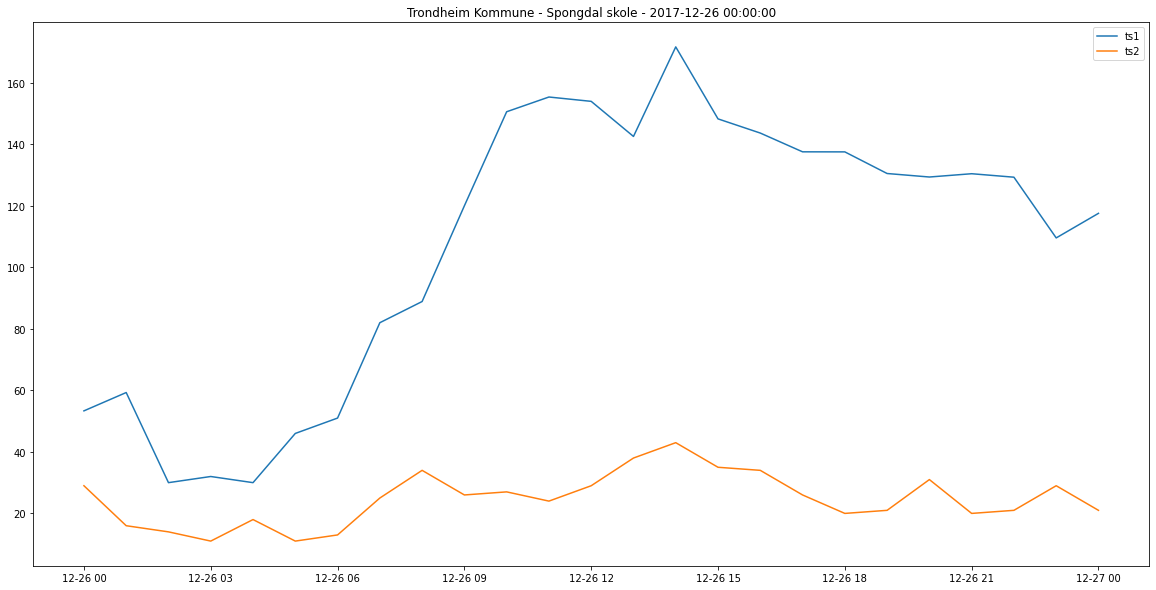

start: 2017-12-26 00:00:00 	 end: 2017-12-27 00:00:00 	 distance: 434.0628210293989


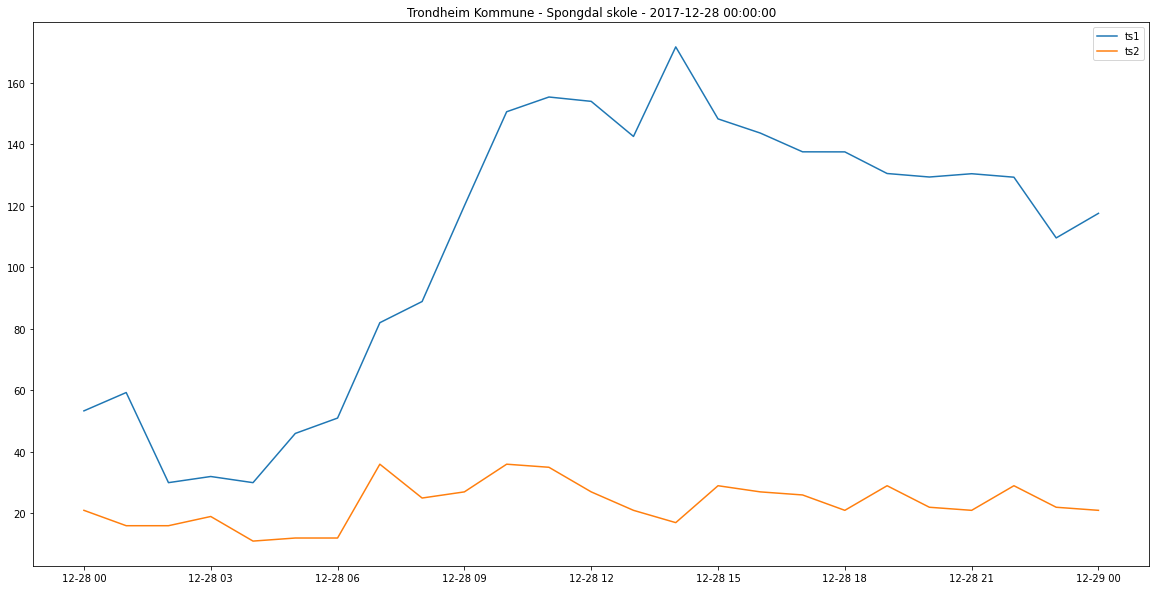

start: 2017-12-28 00:00:00 	 end: 2017-12-29 00:00:00 	 distance: 456.4853914420483


In [15]:
building = list(building_dfs.keys())[5]
example_building = anomalies[building].copy()
example_building.sort_values(ascending=False, inplace=True)
#print(example_building)
# get 10 most anomalous times
most_deviated_days = example_building.index[:5]
# plot all 24 hours of each 10 days

dt_start = datetime.datetime.combine(example_building.index[0], datetime.time.min)
dt_end = dt_start + datetime.timedelta(days=1)
dr = pd.date_range(dt_start, dt_end, freq='H')
ts1 = building_dfs[building]["Totalt"].loc[dr]

for day in most_deviated_days:
    dt_start = datetime.datetime.combine(day, datetime.time.min)
    dt_end = dt_start + datetime.timedelta(days=1)
    
    dr = pd.date_range(dt_start, dt_end, freq='H')
    ts2 = building_dfs[building]["Totalt"].loc[dr]
    # plot ts1 and ts2. let ts1 have same time index as ts2
    # increase plot size
    plt.figure(figsize=(20, 10))
    plt.plot(ts2.index ,ts1.values, label='ts1')
    plt.plot(ts2, label='ts2')
    plt.legend()
    plt.title(f"{building} - {day}")

    distance = dtw.distance(ts1, ts2)
    plt.show()
    print(f"start: {dt_start} \t end: {dt_end} \t distance: {distance}")

Trondheim Kommune - Munkvollhallen                   366.37
Trondheim Kommune - Stavset bskole                   336.88
Trondheim Kommune - Ilsvika barnehage                276.98
Trondheim Kommune - Haukåsen barnehage               216.18
Trondheim Kommune - Persaunet barnehage              193.21
                                                      ...  
Trondheim Kommune - Moltmyra Barnehage                13.33
Trondheim Kommune - Buran helse og Velferdssenter     12.69
Trondheim Kommune - Kattem barnehager                  8.52
Trondheim Kommune - Krinkelkroken Barnehage            7.08
Trondheim Kommune - Festningen barnehage               3.00
Length: 209, dtype: float64
datetime
2016-01-09    47.25
2016-01-08    45.05
2016-01-15    34.38
2018-02-03    32.75
2018-12-14    32.23
              ...  
2017-08-19     3.02
2017-08-05     3.02
2017-07-21     2.97
2017-07-15     2.75
2018-06-16     2.50
Length: 1827, dtype: float64


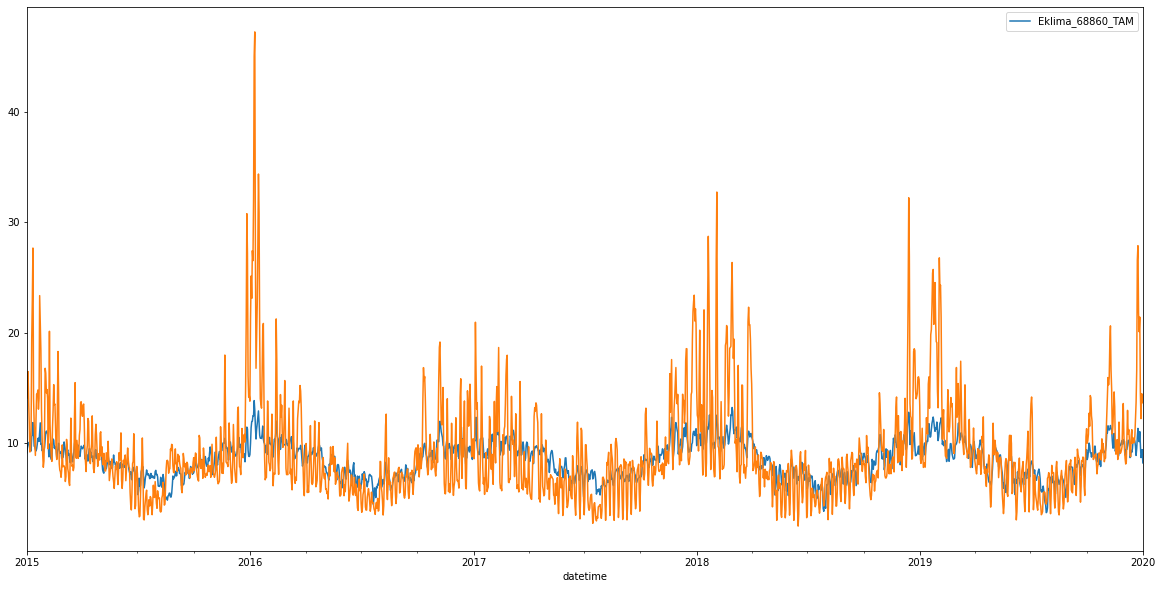

In [16]:
# temperatures from voll
temp_voll = pd.read_excel('data/Volltemp.xlsx', decimal=',')
temp_voll.rename(columns={temp_voll.columns[0]: 'datetime'}, inplace=True)
temp_voll['datetime'] = pd.to_datetime(temp_voll['datetime'], dayfirst=True)
temp_voll.set_index('datetime', inplace=True)
temp_voll.sort_index()
temp_voll = - temp_voll.resample('D').sum() * 0.01 + 10 # negative to align with anomalies
temp_voll.plot()

most_abnormal_buildings = anomalies.sum()
most_abnormal_buildings.sort_values(ascending=False, inplace=True)
print(most_abnormal_buildings)

# sum daily anomaly confidence
total_daily_anomaly = anomalies.sum(axis=1)

# increase plot size
total_daily_anomaly.plot(figsize=(20, 10))
total_daily_anomaly.sort_values(ascending=False, inplace=True)
print(total_daily_anomaly)
plt.show()

In [18]:
# how many anomalies are over threshold
threshold = 0.9
amount = anomalies[anomalies > threshold].count()
# sum of amount
print(amount.sum())
#print(f'{amount} anomalies are over threshold {threshold}')
# get every anomaly that is over threshold

x = np.where(anomalies > threshold)
X = []
group = []
# collect all 24 hours of every anomaly
# go through every building
for building_name in anomalies.columns:
    result = np.where(anomalies[building_name] > threshold)[0]
    for day in anomalies[building_name][result].index:
        day_data = building_dfs[building_name][day:day+datetime.timedelta(hours=23)]
        day_data = day_data.values[:24,0] # get only the first column.
        # append if 24 hours and no nan and no null
        if len(day_data) == 24 and not np.isnan(day_data).any():
            X.append(day_data.tolist()+[building_name, str(day.date())])
            # add datetime to group
            group.append(day.month)

X = np.stack(X).reshape((-1,26)) # the last column is metadata/label
print(X.shape)
X

44
(40, 26)


array([['850.0', '829.0', '786.0', ..., '845.0',
        'Trondheim Kommune - Leangen Ishall', '2019-01-05'],
       ['30.1', '29.0', '31.3', ..., '38.699999999999996',
        'Trondheim Kommune - Sverresmyr interimskole', '2015-03-24'],
       ['39.0', '36.5', '38.1', ..., '36.3',
        'Trondheim Kommune - Sverresmyr interimskole', '2015-03-25'],
       ...,
       ['26.5', '31.1', '32.0', ..., '33.3',
        'Trondheim Kommune - Hammersborg barnehage', '2016-01-06'],
       ['35.0', '33.0', '33.0', ..., '33.0',
        'Trondheim Kommune - Gartneriet barnehage', '2017-12-29'],
       ['24.0', '23.0', '22.0', ..., '25.0',
        'Trondheim Kommune - Brinken barnehage', '2017-11-18']],
      dtype='<U52')

C:\Users\Jacob\AppData\Local\Temp\ipykernel_12508\941075348.py:5: RuntimeWarning: invalid value encountered in true_divide
  X_nolabel = (X_nolabel - X_nolabel.min(axis=-1, keepdims=True)) / (X_nolabel.max(axis=-1, keepdims=True) - X_nolabel.min(axis=-1, keepdims=True))
C:\Users\Jacob\AppData\Roaming\Python\Python310\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 3 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


(38, 24)
[[ 0 17 36]
 [ 1 28  2]
 [ 2 28  1]]


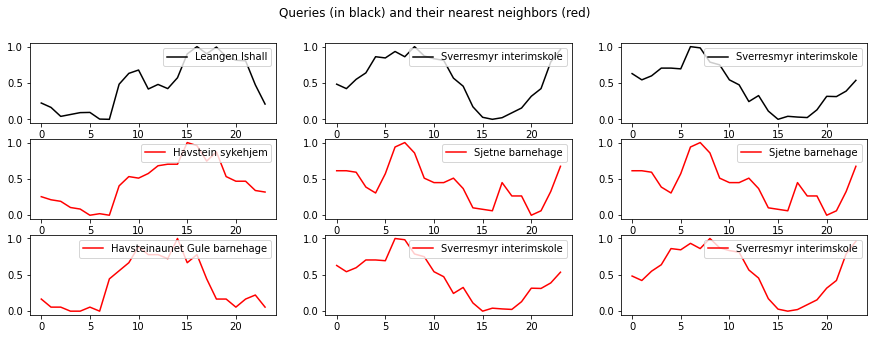

In [37]:
# remove last column and transform to floats
start = 0
X_nolabel = X[start:,:-2].astype(float)
# normalize with minmax so every day is from 0 to 1 using axis=-1
X_nolabel = (X_nolabel - X_nolabel.min(axis=-1, keepdims=True)) / (X_nolabel.max(axis=-1, keepdims=True) - X_nolabel.min(axis=-1, keepdims=True))
# drop nan
X_nolabel = X_nolabel[~np.isnan(X_nolabel).any(axis=1)]

print(X_nolabel.shape)
n_neighbors = 3
n_queries = 3
# knn with dynamic time warping
knn = KNeighborsTimeSeries(n_neighbors=n_neighbors, metric='dtw')
knn.fit(X_nolabel)
ind = knn.kneighbors(X_nolabel[:n_queries], return_distance=False)
print(ind)

fig, ax = plt.subplots(n_queries, 1, figsize=(15, 5))
for idx_ts in range(n_queries):
    plt.subplot(n_neighbors, n_queries, idx_ts + 1)
    plt.plot(X_nolabel[idx_ts].ravel(), "k-" , label=str(X[ind[idx_ts, 0] + start, -2]).split('- ')[1])
    plt.legend(loc='upper right')
    for rank_nn in range(n_neighbors -1):
        plt.subplot(n_neighbors + 0, n_queries, idx_ts + (n_queries * (rank_nn + 1)) + 1)
        # plot the neighbor and label it with metadata
        plt.plot(X_nolabel[ind[idx_ts, rank_nn +1]].ravel(), "r-", label=str(X[ind[idx_ts, rank_nn +1] + start, -2]).split('- ')[1])
        # set legend to upper right
        plt.legend(loc='upper right')
plt.suptitle("Queries (in black) and their nearest neighbors (red)")
plt.show()

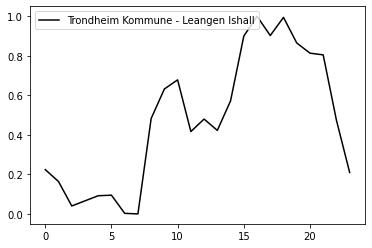

Trondheim Kommune - Nidarvoll bskole - Paviljong       0.15
Trondheim Kommune - Havsteinaunet Gule barnehage       0.10
Trondheim Kommune - Ranheim helse og velferdssenter    0.10
Trondheim Kommune - Leangen Ishall                     0.05
Trondheim Kommune - Havstein sykehjem                  0.05
dtype: float64


C:\Users\Jacob\AppData\Roaming\Python\Python310\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [44]:
query_idx = 0
n_neighbors = 20

plt.plot(X_nolabel[query_idx].ravel(), "k-", label=str(X[query_idx + start, -2]))
plt.legend()
plt.show()

knn = KNeighborsTimeSeries(n_neighbors=n_neighbors, metric='dtw')
knn.fit(X_nolabel)
ind = knn.kneighbors(X_nolabel[query_idx].reshape(1, -1), return_distance=False)

# count labels of all n nearest neighbors
labels = X[ind[0, :] + start, -2]
# create pd series with each label counted
label_counts = pd.Series(labels).value_counts()
# sort by count
label_counts.sort_values(ascending=False, inplace=True)
# create percanetage of each label
label_counts = label_counts / label_counts.sum()
# get 5 labels with highest percentage
print(label_counts.head(5))



20.141 --> 13.648 --> 13.250 --> 13.160 --> 13.077 --> 13.032 --> 13.032 --> 
Soft-DTW k-means
83.612 --> 48.278 --> 47.296 --> 47.287 --> 47.307 --> 47.285 --> 47.299 --> 47.281 --> 47.295 --> 47.287 --> 47.285 --> 47.284 --> 47.285 --> 47.283 --> 47.283 --> 47.282 --> 47.283 --> 47.282 --> 47.282 --> 47.282 --> 47.282 --> 47.282 --> 47.282 --> 47.282 --> 47.282 --> 47.282 --> 47.282 --> 


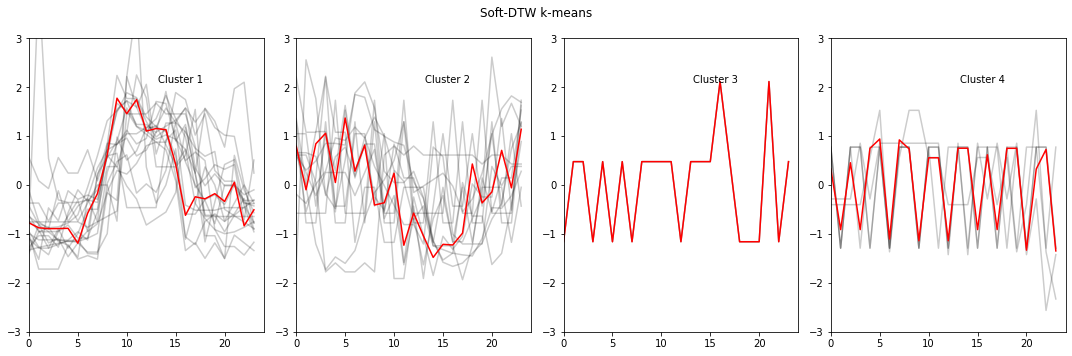

In [46]:
# Author: Romain Tavenard
# License: BSD 3 clause
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train = X_nolabel[:500]
numpy.random.shuffle(X_train)
# Keep only x time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
# X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]
clusters = 4

km = TimeSeriesKMeans(n_clusters=clusters, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15, 5))

print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=clusters,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(clusters):
    plt.subplot(1, clusters, yi + 1)

    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-3, 3)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
        
plt.suptitle("Soft-DTW k-means")
plt.tight_layout()
plt.show()